# Recommendation Problem

### Importing packages

In [431]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import datetime
import statsmodels.formula.api as sm
import statsmodels.stats.diagnostic as sms


#    -- Scikit Learn --
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score
#Importing a package for Using Ridge and Lasso Analysis
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import scale
# Splitting the Data Set into two Folds: Training and Testing using train_test_split()
from sklearn.cross_validation import train_test_split
# Tool for calculating MSE
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import scale


#    -- Packages for Visualization --
import seaborn as sns

# Plotly
import plotly
from plotly.graph_objs import *
import plotly.offline as plot
plot.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Scatter Plot
from pandas.tools.plotting import scatter_matrix

%matplotlib inline

### Reading Files

In [432]:
user_data = pd.read_table('u.data', sep='\t', names=['user id', 'item id', 'rating', 'timestamp'])

In [433]:
user_user = pd.read_table('u.user', sep='|',names=['user id', 'age', 'gender', 'occupation', 'zip code'])

### 1. Distribution of Age group across all users

##### Using Matplotlib

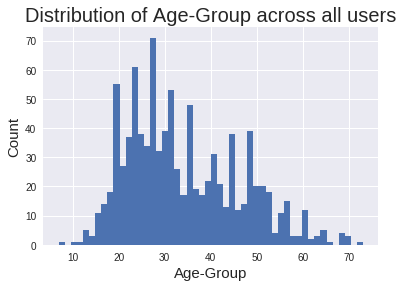

In [434]:
age_count = user_user.age

# Histogram Legends --
plt.title("Distribution of Age-Group across all users", fontsize=20)
plt.xlabel("Age-Group", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.hist(age_count, bins=50)
plt.show()

##### Using Plotly

In [435]:
data = [go.Histogram(x = user_user.age)]

layout = dict(xaxis = dict(title = 'Age'), yaxis = dict(title ='Frequency'))
              
fig = dict(data = data, layout = layout)                      
plot.iplot(fig, 'Distribution of Age-Group across all users')

### 2. Distribution of Ratings across all users

##### Using Matplotlib

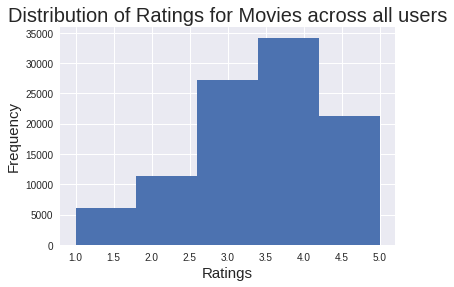

In [436]:
ratings_count = user_data.rating

# Histogram Legends --
plt.title("Distribution of Ratings for Movies across all users", fontsize=20)
plt.xlabel("Ratings", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.hist(ratings_count, bins=5)
plt.show()

##### Using Plotly

In [437]:
data = [go.Histogram(x = user_data.rating)]

layout = dict(xaxis = dict(title = 'Ratings'), yaxis = dict(title ='Frequency'))
              
fig = dict(data = data, layout = layout)                      
plot.iplot(fig, 'Distribution of Ratings for Movies across all users')

### 3. Average Rating over the years 1997-98

In [621]:
# Converting Uinx timestamp into Date format
user_data.timestamp = pd.to_datetime(user_data.timestamp, unit='s')
user_data['date'] = user_data.timestamp.dt.date

##### Using Matplotlib

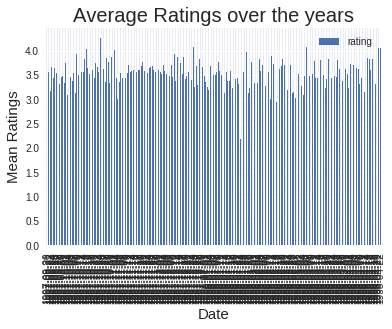

In [625]:
# Dataframe with Date along with Mean Ratings
avg_rating = user_data.groupby('date').mean().iloc[:,2].plot(kind='bar', legend=True)

# Bar Graph legends
avg_rating.set_title("Average Ratings over the years", fontsize=20)
avg_rating.set_xlabel("Date", fontsize=15)
avg_rating.set_ylabel("Mean Ratings", fontsize=15)

##### Using Plotly

In [626]:
Average_rating_Date = pd.DataFrame(user_data.groupby(['date']).rating.mean(), index=None)

trace0 = Scatter(
        x = Average_rating_Date.index,
        y = Average_rating_Date.rating,
)
data = [trace0]
layout = dict(xaxis = dict(title = 'Date'),
              yaxis = dict(title = 'Mean Ratings'),
              )
fig = dict(data = data, layout = layout)
plot.iplot(fig, filename='Rating Scatter Histogram')

### 4.  Stacked Bar Plot Based on Gender for Average Ratings Vs Age group

In [783]:
# Merged the two Dataframes into one DataFrame
Final_table = pd.merge(user_data, user_user, on='user id')

#### Using Pivot Table to form a DF with Gender based Avg Ratings

In [784]:
# Using Pivot Table -
AvgRating_Age_Gender = pd.pivot_table(Final_table, index=['age','gender'], aggfunc='mean')

# Unstack the index(Gender) to Column, with values = Average Ratings
AvgRating_Age_Gender = AvgRating_Age_Gender.unstack().drop(['item id', 'user id'], axis=1)

# OR Using groupby(): pd.DataFrame(Final_table.groupby(['age','gender']).rating.mean()).unstack().head() 

#### Forming Age Intervals

In [785]:
AvgR_A_G = AvgRating_Age_Gender.copy()
AvgR_A_G.reset_index(inplace = True)

In [787]:
AvgR_A_G['Interval'] = pd.cut(AvgR_A_G['age'], bins=[6, 10, 20, 30, 40, 50, 60, 70, 80], labels=False)
labels = np.array('7-10 11-20 21-30 31-40 41-50 51-60 61-70 71-80'.split())
AvgR_A_G['Interval'] = labels[AvgR_A_G['Interval']]

In [788]:
AvgR_A_G = pd.DataFrame(AvgR_A_G.groupby(['Interval']).mean(), index =None)

/home/user/StackRoute/Recommendation_Model/lib/python3.6/site-packages/pandas/core/base.py:324: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [789]:
AvgR_A_G.Interval = AvgR_A_G.Interval.astype(str)

##### Using Plotly

In [790]:
trace0 = Bar(
            x = AvgR_A_G.age,
            y = AvgR_A_G.rating.M,
            name = 'Male'
            )
trace1 = Bar(
            x = AvgR_A_G.age,
            y = AvgR_A_G.rating.F,
            name = 'Female')
data = [trace0 , trace1]
layout = dict(xaxis = dict(title = 'Age Range'),
              yaxis = dict(title = 'Ratings'),
              barmode = 'stack')
fig = dict(data = data, layout = layout)
plot.iplot(fig, 'Gender ratings')

### 5. Occupation by Average Rating

##### Using Plotly

In [718]:
occupation_rating = pd.DataFrame(Final_table.groupby(['occupation']).rating.mean(), index=None)

In [719]:
trace0 = Bar(
        x = occupation_rating.index,
        y = occupation_rating.rating,
        
)
data = [trace0]
layout = dict(xaxis = dict(title = 'Age'),
              yaxis = dict(title = 'Average Rating'),
              barmode='group'
              )
fig = dict(data = data, layout = layout)
plot.iplot(fig, filename='Average rating vs occupation')